# Исследование рынка недвижимости в Санкт-Петербурге и соседних населённых пунктах

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования** — установление параметров для определения рыночной стоимости объектов недвижимости:

**Ход исследования**

Данные для проведения исследования находятся в файле `real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед анализом понадобится обзор данных. 

После обзора необходимо проверить данные на ошибки, оценить их влияние на исследование и исправить их.

Затем нужно добавить колонки с данными, необходимыми для дальнейшего анализа.

Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление данных.
 4. Анализ данных.
 5. Общие выводы


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных-" data-toc-modified-id="Обзор-данных--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных <a id="start"></a></a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных<a id="preprocessing"></a></a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков<a id="headings"></a></a></span></li><li><span><a href="#Пропуски-в-данных-" data-toc-modified-id="Пропуски-в-данных--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски в данных <a id="null"></a></a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Типы данных<a id="types"></a></a></span></li><li><span><a href="#Дубликаты-" data-toc-modified-id="Дубликаты--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Дубликаты <a id="duplicates"></a></a></span></li></ul></li><li><span><a href="#Добавление-расчетных-данных-" data-toc-modified-id="Добавление-расчетных-данных--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление расчетных данных <a id="newdata"></a></a></span><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра-" data-toc-modified-id="Цена-квадратного-метра--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена квадратного метра <a id="squaremeter"></a></a></span></li><li><span><a href="#День-недели,-месяц-и-год--публикации-объявления-" data-toc-modified-id="День-недели,-месяц-и-год--публикации-объявления--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели, месяц и год  публикации объявления <a id="date"></a></a></span></li><li><span><a href="#Этаж-квартиры-" data-toc-modified-id="Этаж-квартиры--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Этаж квартиры <a id="floor"></a></a></span></li><li><span><a href="#Соотношение-жилой-и-общей-площади,-отношение-площади-кухни-к-общей" data-toc-modified-id="Соотношение-жилой-и-общей-площади,-отношение-площади-кухни-к-общей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Соотношение жилой и общей площади, отношение площади кухни к общей<a id="ratio"></a></a></span></li></ul></li><li><span><a href="#Анализ-данных--" data-toc-modified-id="Анализ-данных---4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных  <a id="analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков-" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков <a id="analysis1"></a></a></span></li><li><span><a href="#Время-продажи-квартиры-" data-toc-modified-id="Время-продажи-квартиры--4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры <a id="analysis2"></a></a></span></li><li><span><a href="#Факторы,-влияющие-на-стоимость-квартиры-" data-toc-modified-id="Факторы,-влияющие-на-стоимость-квартиры--4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, влияющие на стоимость квартиры <a id="analysis3"></a></a></span></li><li><span><a href="#10-населенных-пунктов-с-наибольшим-числом-объявлений-" data-toc-modified-id="10-населенных-пунктов-с-наибольшим-числом-объявлений--4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>10 населенных пунктов с наибольшим числом объявлений <a id="analysis4"></a></a></span></li><li><span><a href="#Квартиры-в-Санкт-Петербурге-" data-toc-modified-id="Квартиры-в-Санкт-Петербурге--4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Квартиры в Санкт-Петербурге <a id="analysis5"></a></a></span></li><li><span><a href="#Квартиры-в-центре-" data-toc-modified-id="Квартиры-в-центре--4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Квартиры в центре <a id="analysis6"></a></a></span></li></ul></li><li><span><a href="#Общие-выводы-" data-toc-modified-id="Общие-выводы--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы <a id="conclusion"></a></a></span></li></ul></div>

## Обзор данных <a id='start'></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считаем и сохраним датасет в переменную:

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')

Выведем на экран первые, последние и случайные пять строк таблицы, а также общую информацию. Создадим для этого собственную функцию:

In [3]:
def total_view(df: pd.DataFrame, n_rows=5, seed=None):
    '''Возвращает первые, случайные и последние строки таблицы (по умолчанию по 5 строк)'''
    return display(pd.concat([
                              df.head(n_rows),
                              df.sample(n_rows, random_state=seed),
                              df.tail(n_rows)
                             ]))

total_view(df)
display(df.describe().T)
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
1736,3,3800000.0,33.80,2017-10-19T00:00:00,1,2.50,10.0,18.7,4,NaN,...,7.00,2.0,Санкт-Петербург,33954.0,14256.0,0.0,NaN,0.0,NaN,4.0
6229,12,3100000.0,43.20,2017-04-22T00:00:00,2,2.50,5.0,27.9,3,NaN,...,5.80,0.0,Ломоносов,48466.0,51891.0,0.0,NaN,0.0,NaN,33.0
21438,6,5450000.0,67.30,2016-06-30T00:00:00,3,2.50,9.0,44.0,7,False,...,8.80,1.0,Санкт-Петербург,25221.0,14442.0,0.0,NaN,0.0,NaN,60.0
7694,4,30000000.0,251.00,2017-07-27T00:00:00,7,3.50,5.0,193.0,4,NaN,...,21.00,NaN,Санкт-Петербург,22068.0,3334.0,0.0,NaN,1.0,802.0,613.0
2136,3,1580000.0,31.00,2017-06-12T00:00:00,1,NaN,5.0,16.0,3,NaN,...,6.00,0.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,90.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В таблице 22 колонки и 23699 строк. Тип данных в столбцах — `bool`, `float`, `int` и `object`.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении.

Не все названия колонок записаны корректно: название `cityCenters_nearest` с нарушением стиля, а `open_plan` и `studio` содержат булев тип данных, названия таких колонок принято начинать с `is_`.

В колонках `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`,  `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропущенные значения.

В колонке `first_day_exposition` указана дата, а тип данных `object`. 
Часть колонок с типом данных `float` описывает неделимые объекты (например, количество балконов, число водоемов и парков, этажей в доме).

В данных встречаются выбросы (площадь квартиры 900 м², высота потолков 100 м и тп.). 

**Выводы**

В каждой строке таблицы — данные о выставленной на продажу квартире. Колонки описывают характеристики объекта - площадь, количество балконов, вид планировки, этаж, наличие парков и водоемов неподалеку и другие. Часть данных вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Предварительно можно утверждать, что, данных для установления параметров достаточно. Но прежде чем приступать к проверке, необходимо устранить следующие проблемы в данных:

* Переименовать колонки `studio`, `open_plan` и `cityCenters_nearest`;
* Проанализировать и устранить пропуски, где это возможно;
* Привести данные к нужным типам;
* Проверить и удалить дубликаты.


## Предобработка данных<a id='preprocessing'></a>

### Стиль заголовков<a id='headings'></a>
Выведем на экран названия столбцов:

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Переименуем столбцы `studio`, `open_plan` и `cityCenters_nearest` в `is_studio`, `is_open_plan` и `city_centers_nearest` соответственно:

In [5]:
df = df.rename(columns={
                        'studio':'is_studio', 
                        'open_plan':'is_open_plan', 
                        'cityCenters_nearest':'city_centers_nearest'
                       }
              )
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Пропуски в данных <a id='null'></a>
Оценим и обработаем пропуски в каждой колонке. Начнем с колонки `ceiling_height`, которая содержит в себе данные о высоте потолков. Вероятнее всего пропуски образовались из-за того, что продавец не указал эти данные, потому что не знал величину или считал ее размер очевидным. Так как высота потолков в домах чаще всего не сильно разнится, ввиду малой дисперсии в данном параметре, заполним пропуски медианным значением. Рассчитаем медиану:

In [6]:
df['ceiling_height'].median()

2.65

2,65 метра выглядит реально, заполним пропуски:

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)
df['ceiling_height'].isna().sum()

0

Пропуски в `floors_total` также образовались из-за человеческого фактора. Данные из колонки `floors_total` понадобятся для дальнейшего анализа, но самостоятельное заполнение в данном случае будет некорректно. Посчитаем долю пропусков в `floors_total`:

In [8]:
df['floors_total'].isna().sum() / df.shape[0]

0.0036288450989493226

Меньше 0,4% значений - достаточно мало, чтобы повлиять на репрезентативность выборки. Удалим строки:

In [9]:
df = df.dropna(subset=['floors_total'])
df['floors_total'].isna().sum()

0

Пропущенные значения жилой площади в `living_area` и площади кухни в `kitchen_area` весьма очевидны, не каждый вспомнит такие подробности о квартире при заполнении анкеты. Посмотрим долю пропусков и корреляцию с другими данными:
<a id='1'></a>

In [10]:
living_area_null = df['living_area'].isna().sum() / df.shape[0]
kitchen_area_null = df['kitchen_area'].isna().sum() / df.shape[0]
print(f'Доля пропущенных значений в living_area {living_area_null:.2%}')
print(f'Доля пропущенных значений в kitchen_area {kitchen_area_null:.2%}')

Доля пропущенных значений в living_area 7.92%
Доля пропущенных значений в kitchen_area 9.45%


Text(0.5, 1, 'Площадь кухни')

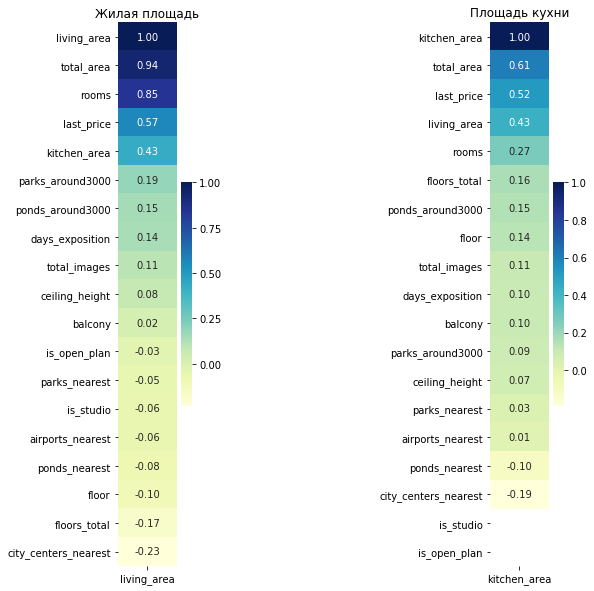

In [11]:
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=4)
plt.subplot(1, 2, 1)
(sns.heatmap(df
             .corr()[['living_area']]
             .sort_values(by='living_area', ascending=False), cmap="YlGnBu", annot=True, fmt='.2f'
            )
)
plt.title('Жилая площадь')
plt.subplot(1, 2, 2)
(sns.heatmap(df
             .corr()[['kitchen_area']]
             .sort_values(by='kitchen_area', ascending=False), cmap="YlGnBu", annot=True, fmt='.2f'
            )
)
plt.title('Площадь кухни')

Жилая площадь напрямую коррелирует с общей площадью. Корреляция сильная, составляет 0.94. Площадь кухни также сильнее всего коррелирует с общей площадью. Корреляция положительная, коэффициент Пирсона составляет 0.61. Посмотрим среднее и медианное соотношение жилой и общей площади:

In [12]:
(df['living_area'] / df['total_area']).describe()

count    21743.000000
mean         0.564948
std          0.105294
min          0.021583
25%          0.495546
50%          0.568182
75%          0.637956
max          1.000000
dtype: float64

Среднее и медианное соотношение жилой площади к общей составляет 0.56. Заполним пропуски в `living_area` с учетом этого соотношения:

In [13]:
df.loc[df['living_area'].isna(), 'living_area'] = 0.56 * df['total_area']

Посмотрим среднее и медианное соотношение площади кухни и общей площади:

In [14]:
(df['kitchen_area'] / df['total_area']).describe()

count    21382.000000
mean         0.187324
std          0.072976
min          0.025381
25%          0.133333
50%          0.172348
75%          0.232428
max          0.787879
dtype: float64

Среднее соотношение площади кухни к общей составляет 0.19, медианное 0.17. Заполним пропуски в `kitchen_area` с учетом медианного соотношения:

In [15]:
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = 0.17 * df['total_area']

Колонка `is_apartment`, кроме пропусков, содержит булев тип данных. Посмотрим на количество пропусков и какие значения встречаются в колонке:

In [16]:
is_apartment_null = df['is_apartment'].isna().sum() / df.shape[0]
print('Пропущенные значения в is_apartment:', df['is_apartment'].isna().sum())
print(f'Доля пропущенных значений в living_area: {is_apartment_null:.2%}')
df['is_apartment'].value_counts()

Пропущенные значения в is_apartment: 20838
Доля пропущенных значений в living_area: 88.25%


False    2725
True       50
Name: is_apartment, dtype: int64

Доля пропусков очень большая, учитывая количество пропусков в других колонках и то, что апартаментов в такой большой выборке оказалось всего 50, можно сделать вывод о сбое при выгрузке данных. Заполнение пропусков значениями не имеет смысла, так как может привести к сильному искажению. Оставляем колонку как есть, тип данных в колонке из-за наличия пропускв останется `object`.

В колонке `balcony` указано количество балконов. Посмотрим сколько там пропусков и значений:

In [17]:
df['balcony'].value_counts(dropna=False)

NaN    11480
1.0     4195
0.0     3713
2.0     3657
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Можно предположить, что значения пропущены продавцом там, где нет балконов и заполнить пропуски нулями.

In [18]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

Посчитаем количество и долю пропусков в `locality_name`:

In [19]:
locality_name_null = df['locality_name'].isna().sum() / df.shape[0]
print('Пропущенные значения в locality_name:', df['locality_name'].isna().sum())
print(f'Доля пропущенных значений в locality_name: {locality_name_null:.2%}')

Пропущенные значения в locality_name: 48
Доля пропущенных значений в locality_name: 0.20%


Всего 48 позиций или 0.02% это не много. Похоже на сбой при заполнении анкеты на сайте или невнимательность продавца. Удалим строки:

In [20]:
df = df.dropna(subset=['locality_name'])
df['locality_name'].isna().sum()

0

В колонках `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, собраны данные, заполненные автоматически на основе картографических данных. Пропуски могли возникнуть при заполнении или выгрузке. Так как полный адрес объектов не известен, а для анализа указанные колонки не потребуются, оставим их как есть.

Пропуски количества дней от публикации до снятия в `days_exposition` могли возникнуть только автоматическим путем, так как, обычно, подобная информация не вносится вручную. Посчитаем количество и долю пропусков:
<a id='2'></a>

In [21]:
days_exposition_null = df['days_exposition'].isna().sum() / df.shape[0]
print('Пропущенные значения в days_exposition:', df['days_exposition'].isna().sum())
print(f'Доля пропущенных значений в days_exposition: {days_exposition_null:.2%}')

Пропущенные значения в days_exposition: 3171
Доля пропущенных значений в days_exposition: 13.46%


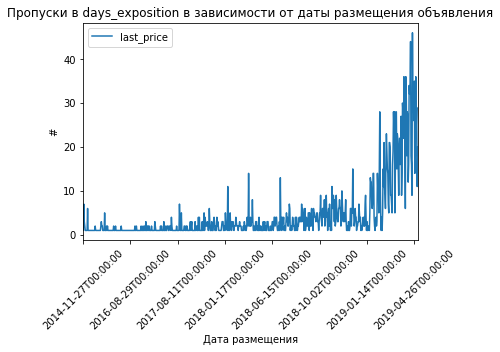

In [22]:
(df[df['days_exposition'].isna()]
 .pivot_table(index='first_day_exposition', values='last_price', aggfunc='count')
 .plot()
)
plt.title('Пропуски в days_exposition в зависимости от даты размещения объявления')
plt.ylabel('#')
plt.xlabel('Дата размещения')
plt.xticks(rotation=45);

По объявлениям, размещенным после января 2019 года стало резко возрастать количество пропущенных значений в `days_exposition`. С большой долей вероятности пропуски относятся к непроданным квартирам. Такая взаимосвязь не похожа на случайную, поэтому заполнение средним или медианой будет искажать итоговые данные. Оставим пропуски без изменений.

Убедимся, что в таблице не осталось пропусков в нужных столбцах:

In [23]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

### Типы данных<a id='types'></a>
В колонке `first_day_exposition` указана дата публикации объявления о продаже квартиры, тип данных - `object`. Для удобства работы с датой изменим тип данных на `datetime`:

In [24]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
df.loc[:10, 'first_day_exposition']

0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
Name: first_day_exposition, dtype: datetime64[ns]

В колонках `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`остались пропущенные значения NaN, поэтому тип данных будет float, в них тип изменять не будем.
Изменим тип данных в колонках `last_price`, `floors_total`, `balcony` с float64 на соответствующий int:

In [25]:
df.astype({
    'last_price': 'int32', 
    'floors_total': 'int8', 
    'balcony': 'int8'
    }
).dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                      int8
living_area                    float64
floor                            int64
is_apartment                    object
is_studio                         bool
is_open_plan                      bool
kitchen_area                   float64
balcony                           int8
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Дубликаты <a id='duplicates'></a>
Проверим датафрейм на наличие дубликатов:

In [26]:
df.duplicated().sum()

0

## Добавление расчетных данных <a id='newdata'></a>
### Цена квадратного метра <a id='squaremeter'></a>
Добавим колонку с ценой за квадратный метр, округлим дробную часть до сотых:

In [27]:
df['square_meter_price'] = round(df['last_price'] / df['total_area'], 2)
df['square_meter_price'][:10]

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
5     95065.79
6     99195.71
7    110544.69
8     87454.76
9     88524.59
Name: square_meter_price, dtype: float64

### День недели, месяц и год  публикации объявления <a id='date'></a>
Добавим колонки с днем недели, месяцем и годом публикации объявления:

In [28]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.loc[:10, 'weekday':'year']

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018
5,0,9,2018
6,3,11,2017
7,3,4,2019
8,2,5,2018
9,6,2,2017


Проверим уникальные значения дней недели:

In [29]:
df['weekday'].unique()

array([3, 1, 4, 0, 2, 6, 5])

Ровно 7, как и дней в неделе. Составим словарь дней недели в соответствии с уникальными значениями дней недели и заменим цифры на текстовые названия дней недели. Проверим результат:

In [30]:
weekdays_dict = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 
                 4: 'пятница', 5: 'суббота', 6: 'воскресенье'
                }
df['weekday'] = df['weekday'].map(weekdays_dict)
df['weekday'][:10]

0        четверг
1        вторник
2        четверг
3        пятница
4        вторник
5    понедельник
6        четверг
7        четверг
8          среда
9    воскресенье
Name: weekday, dtype: object

### Этаж квартиры <a id='floor'></a>
Добавим колонку с категориями этажей - первый, последний и другой и проверим результат:

In [31]:
df['floor_category'] = np.where(df['floor'] == 1, 'первый', 'другой')
df['floor_category'] = np.where(df['floor'] == df['floors_total'], 'последний', df['floor_category'])
print(df['floor_category'].unique())
df['floor_category'][:10]

['другой' 'первый' 'последний']


0    другой
1    первый
2    другой
3    другой
4    другой
5    другой
6    другой
7    другой
8    другой
9    другой
Name: floor_category, dtype: object

### Соотношение жилой и общей площади, отношение площади кухни к общей<a id='ratio'></a>
Добавим колонки с соотношением жилой и общей площади, а также с отношением площади кухни к общей и проверим результат:

In [32]:
df['living_area_ratio'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 2)
df.loc[:10, ['living_area_ratio', 'kitchen_area_ratio']]

,living_area_ratio,kitchen_area_ratio
0,0.47,0.23
1,0.46,0.27
2,0.61,0.15
3,0.56,0.17
4,0.32,0.41
5,0.47,0.30
6,0.28,0.39
7,0.56,0.26
8,0.47,0.27
9,0.71,0.11


## Анализ данных  <a id='analysis'></a>

### Площадь, цена, число комнат, высота потолков <a id='analysis1'></a>
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра:

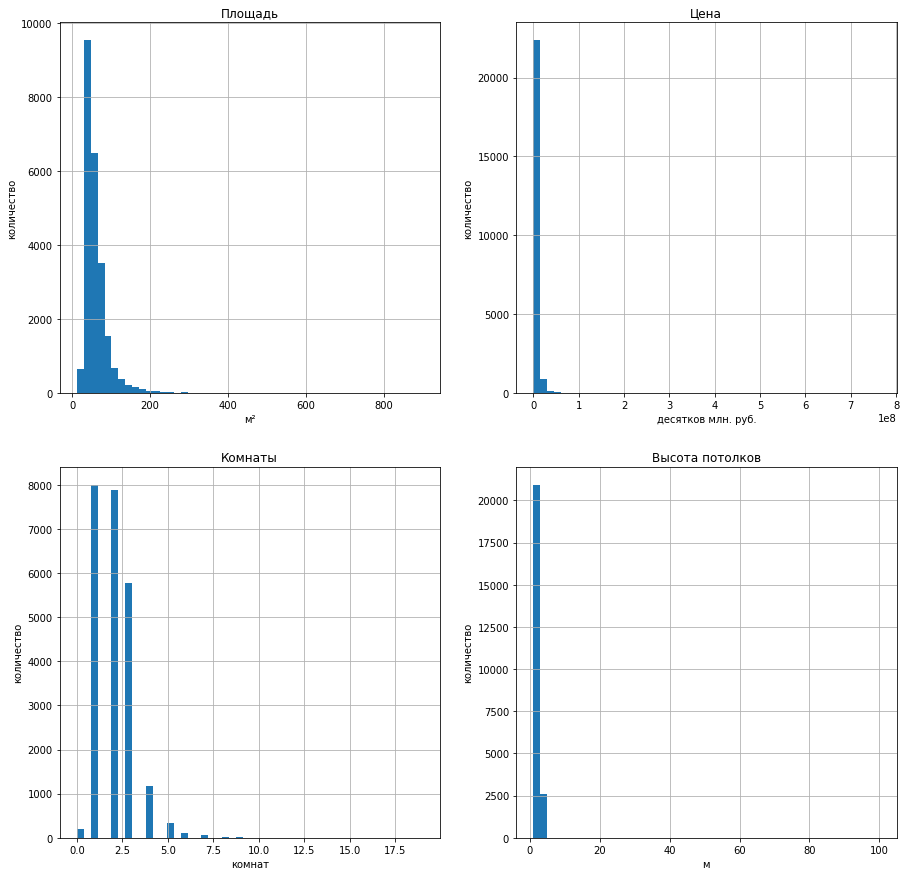

In [33]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
plt.figure(figsize=(15, 15))
cnt = 1
for column in columns_list:
    plt.subplot(2, 2, cnt)
    df[column].hist(bins=50)
    plt.ylabel('количество')
    if cnt == 1:
        plt.title('Площадь')
        plt.xlabel('м²')
    if cnt == 2:
        plt.title('Цена')
        plt.xlabel('десятков млн. руб.')
    if cnt == 3:
        plt.title('Комнаты')
        plt.xlabel('комнат')
    if cnt == 4:
        plt.title('Высота потолков')
        plt.xlabel('м')
    cnt += 1

По графикам видно, что в данных много выбросов. Чтобы выбросы в данных не отображались на графиках, рассчитаем границы 'усов' диаграммы размаха и используем в качестве границ гистограмм по оси X. Для этого напишем функцию, возвращающую границы 'усов' диаграммы размаха:

In [34]:
def whiskers(column_name):
    ''' Возвращает границы "усов" графика "ящик с усами" колонки column_name, используя правила:
    
    длина усов равна 1.5 межквартильного размаха;
    если левый ус меньше минимального значения, то его граница - минимальное значение;
    если правый ус больше максимального значения, то его граница максимальное значение.
    
    '''
    values = df[column_name].describe()
    iqr = values[6] - values[4]
    left = values[4] - 1.5 * iqr
    right = values[6] + 1.5 * iqr
    if left < values[3]:
        left = values[3]
    if right > values[7]:
        right = values[7]
    return left, right

Построим гистограммы для каждого параметра с учетом границ нормальных значений:

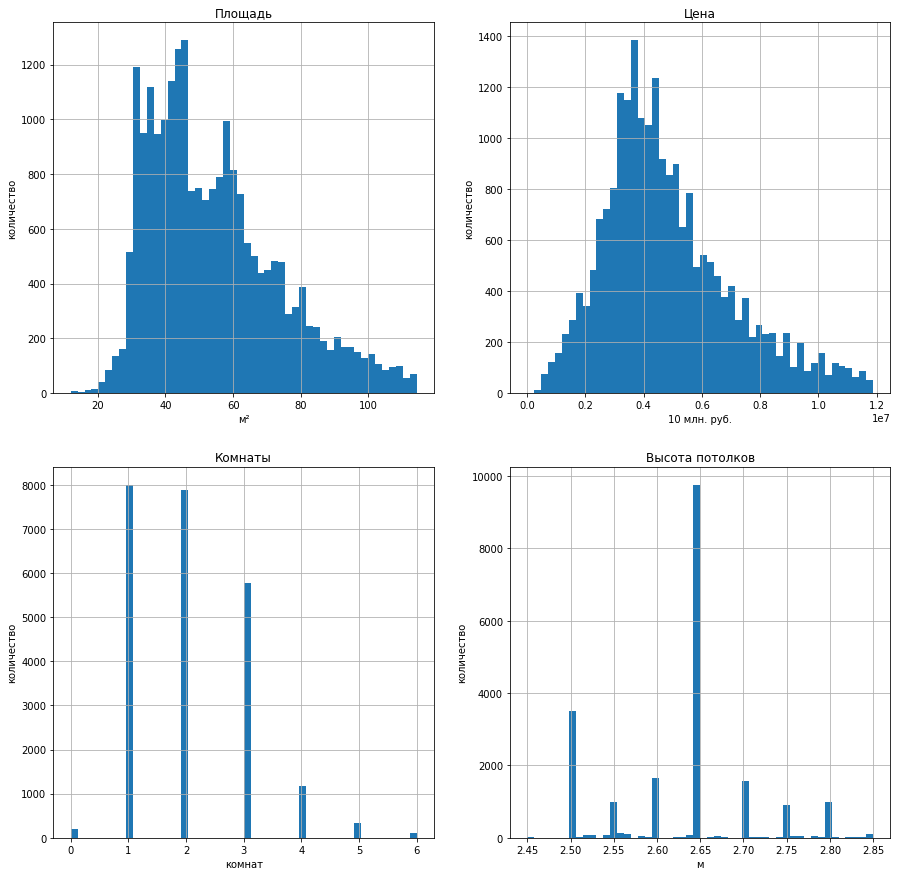

In [35]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
plt.figure(figsize=(15, 15))
cnt = 1
for column in columns_list:
    plt.subplot(2, 2, cnt)
    df[column].hist(range=(whiskers(column)), bins=50)
    plt.ylabel('количество')
    if cnt == 1:
        plt.title('Площадь')
        plt.xlabel('м²')
    if cnt == 2:
        plt.title('Цена')
        plt.xlabel('10 млн. руб.')
    if cnt == 3:
        plt.title('Комнаты')
        plt.xlabel('комнат')
    if cnt == 4:
        plt.title('Высота потолков')
        plt.xlabel('м')
    cnt += 1

Выведем границы нормальных значений по каждой колонке:

In [36]:
columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in columns_list:
    print(column, whiskers(column))

total_area (12.0, 114.25)
last_price (12190.0, 11875000.0)
rooms (0.0, 6.0)
ceiling_height (2.45, 2.8500000000000005)


**Выводы**

Самые часто встречающиеся парметры квартир, выставленных на продажу, следующие:
* площадь от 30 до 50 м²;
* цена от 3 до 5 млн. руб.;
* 1-2, немного реже 3 комнаты;
* высота потолков 2.65 м.

Аномальные параметры квартир следующие:
* площадь меньше 12 или больше 114.25 м²;
* цена меньше 12 тыс. руб. (сумма 13 тыс. руб. тоже выглядит нереальной, установим нижний лимит в 500 тыс. руб.) и больше 11.875 млн. руб.;
* наличие больше 6 комнат (0 комнат может быть указано в квартире-студии);
* высота потолка менее 2.45 м и более 2.85 м.

### Время продажи квартиры <a id='analysis2'></a>
Изучим время продажи квартиры. Для начала построим ящик с усами и гистограмму:

Text(0, 0.5, 'количество')

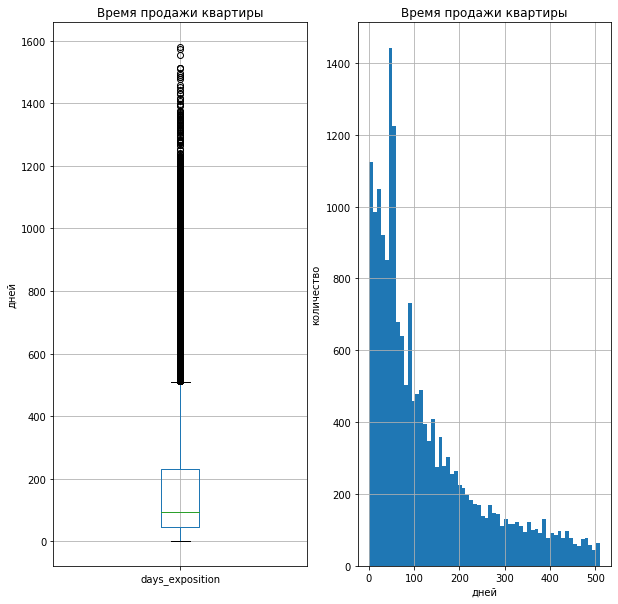

In [37]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
df.boxplot('days_exposition')
plt.title('Время продажи квартиры')
plt.ylabel('дней')
plt.subplot(1, 2, 2)
df['days_exposition'].hist(range=(whiskers('days_exposition')), bins=60)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('количество')

Посмотрим поближе на пик гистограммы:
<a id='3'></a>

Text(0, 0.5, 'количество')

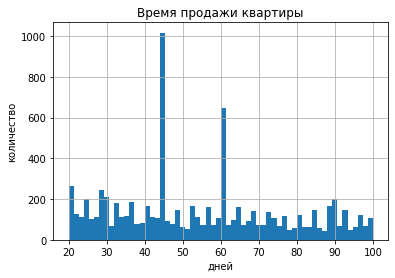

In [38]:
df['days_exposition'].hist(range=(20,100), bins=60)
plt.title('Время продажи квартиры')
plt.xlabel('дней')
plt.ylabel('количество')

Среди записей встречается необычно много значений 45 и 60 дней. Такую аномалию нельзя связать с человеческим фактором. Скорее всего закрытие объявлений на 45 и 60 день происходило автоматически.

Посмотрим на медиану, среднее значение и границы нормальных значений:

In [39]:
print(df[['days_exposition', 'last_price']].describe())
print(whiskers('days_exposition'))

       days_exposition    last_price
count     20394.000000  2.356500e+04
mean        180.741395  6.540058e+06
std         219.732782  1.091093e+07
min           1.000000  1.219000e+04
25%          45.000000  3.400000e+06
50%          95.000000  4.646000e+06
75%         231.000000  6.790000e+06
max        1580.000000  7.630000e+08
(1.0, 510.0)


Выбросы в даных сильно искажают картину. В частности, средняя цена квартиры выше медианной на 30%, а средний срок продажи почти в 2 раза выше медианного. Отфильтруем выбивающиеся значения и сохраним изменения в переменной `good_data`:

In [40]:
good_data = df[(12 <= df['total_area'])
               & (df['total_area'] <= 114.25) 
               & (500000 <= df['last_price'])
               & (df['last_price'] <= 11875000) 
               & (df['rooms'] <= 6) 
               & (2.45 <= df['ceiling_height'])
               & (df['ceiling_height'] <= 2.85) 
               & (1 <= df['days_exposition'])
               & (df['days_exposition'] <= 427)
              ]

Посмотрим на получившийся срез:

In [41]:
good_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,15439.0,9.530410e+00,5.537173e+00,0.00,6.000,9.00,13.00,50.00
last_price,15439.0,4.547255e+06,1.986811e+06,500000.00,3207000.000,4200000.00,5500000.00,11866860.00
total_area,15439.0,5.063040e+01,1.658834e+01,12.00,38.000,46.40,60.50,114.20
rooms,15439.0,1.837554e+00,8.610027e-01,0.00,1.000,2.00,2.00,6.00
ceiling_height,15439.0,2.629430e+00,7.918338e-02,2.45,2.600,2.65,2.65,2.85
floors_total,15439.0,1.139977e+01,6.704199e+00,1.00,5.000,9.00,16.00,52.00
living_area,15439.0,2.870063e+01,1.162575e+01,2.00,18.000,28.00,36.00,88.00
floor,15439.0,6.204676e+00,5.034042e+00,1.00,2.000,5.00,9.00,33.00
kitchen_area,15439.0,9.235186e+00,3.519025e+00,2.00,6.800,8.67,10.90,50.00
balcony,15439.0,6.154544e-01,9.370645e-01,0.00,0.000,0.00,1.00,5.00


In [42]:
good_data.shape

(15439, 29)

Данные стали 'чище', медианные и средние значения цены квартиры и срока продажи теперь не так сильно разнятся. Записей в новой выборке стало на 35% меньше.

**Выводы**

Среди данных о сроке продажи квартиры много выбросов. Они влияют на средний срок продажи 180 дней при медиане в 95 дней. После чистки выборки средний и медианный сроки продажи составили 111 и 74 дня соответственно. Можно сказать, что, обычно, продажа  занимает 74 дня. Аномально короткой продажей следует считать продажу за один день, а аномально долгой более, чем за 427 дней.

### Факторы, влияющие на стоимость квартиры <a id='analysis3'></a>
Построим график зависимости цены от площади квартиры по `good_data`:

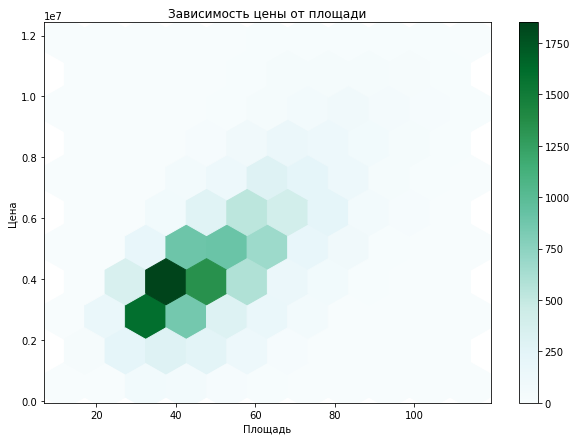

In [43]:
good_data.plot(kind='hexbin', 
               x='total_area', 
               y='last_price',
               title='Зависимость цены от площади',
               figsize=(10,7),
               sharex=False,
               gridsize=10,
               )
plt.ylabel('Цена')
plt.xlabel('Площадь');

Посчитаем коэффициент корреляции Пирсона между ценой и площадью квартиры:

In [44]:
good_data['last_price'].corr(good_data['total_area'])

0.6876462607573951

Между ценой и площадью квартиры прямая зависимость - чем больше площадь, тем больше цена. Корреляция положительная, сильная, коэффициент Пирсона составляет 0.69.

Построим график зависимости цены квартиры от числа комнат:

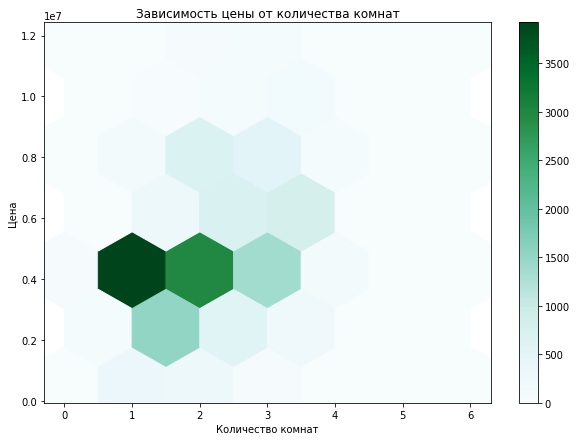

In [45]:
good_data.plot(kind='hexbin', 
               x='rooms', 
               y='last_price',
               title='Зависимость цены от количества комнат',
               figsize=(10,7),
               sharex=False,
               gridsize=6,
               )
plt.ylabel('Цена')
plt.xlabel('Количество комнат');

Посчитаем коэффициент корреляции Пирсона между ценой квартиры и числом комнат:

In [46]:
good_data['last_price'].corr(good_data['rooms'])

0.42115989425671524

Между ценой квартиры и количеством комнат прямая зависимость - чем больше комнат, тем больше цена. Корреляция положительная, средняя, коэффициент Пирсона составляет 0.42.

Построим график зависимости цены квартиры от удаленности от центра:

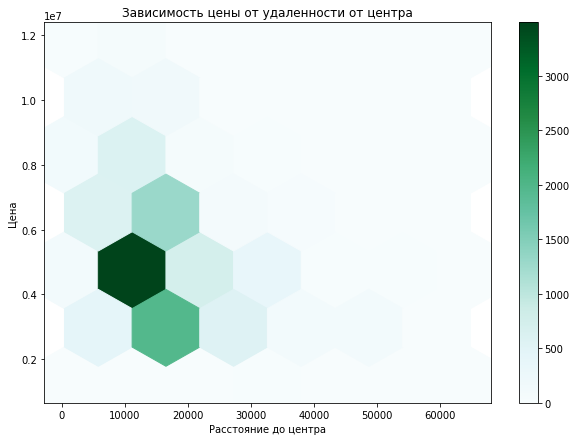

In [47]:
good_data.plot(kind='hexbin', 
                x='city_centers_nearest', 
                y='last_price',
                title='Зависимость цены от удаленности от центра',
                figsize=(10,7),
                sharex=False,
                gridsize=6
                )
plt.ylabel('Цена')
plt.xlabel('Расстояние до центра');

Посчитаем коэффициент корреляции Пирсона между ценой квартиры и удаленностью от центра:

In [48]:
good_data['last_price'].corr(good_data['city_centers_nearest'])

-0.304755303377459

Между ценой квартиры и удаленность от центра обратная зависимость - чем дальше от центра квартира, тем ниже цена. Корреляция отрицательная, слабая, коэффициент Пирсона составляет -0.30.

Построим график зависимости цены квартиры от того, на каком этаже она расположена:

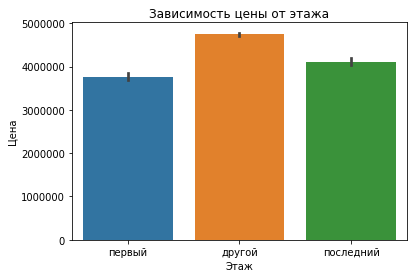

In [49]:
sns.barplot(x='floor_category', y='last_price', data=good_data)
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.title('Зависимость цены от этажа');

Квартиры на первом этаже, как правило, самые дешевые. На последнем этаже - подороже. Самые дорогие квартиры на других этажах.

Посмотрим на зависимость цены квартиры от дня недели, месяца и года размещения:

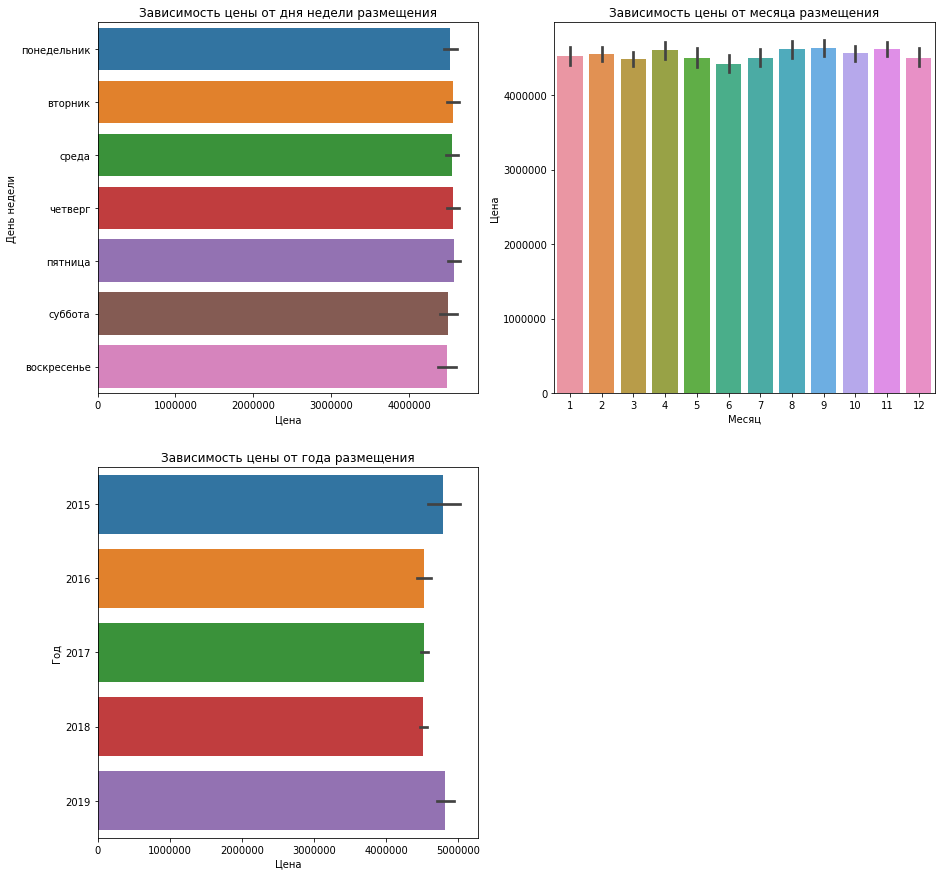

In [50]:
weekday_list = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.barplot(y='weekday', x='last_price', data=good_data, order=weekday_list, orient='h')
plt.xlabel('Цена')
plt.ylabel('День недели')
plt.title('Зависимость цены от дня недели размещения')
plt.subplot(2, 2, 2)
sns.barplot(x='month', y='last_price', data=good_data)
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Зависимость цены от месяца размещения')
plt.subplot(2, 2, 3)
sns.barplot(y='year', x='last_price', data=good_data, orient='h')
plt.xlabel('Цена')
plt.ylabel('Год')
plt.title('Зависимость цены от года размещения');

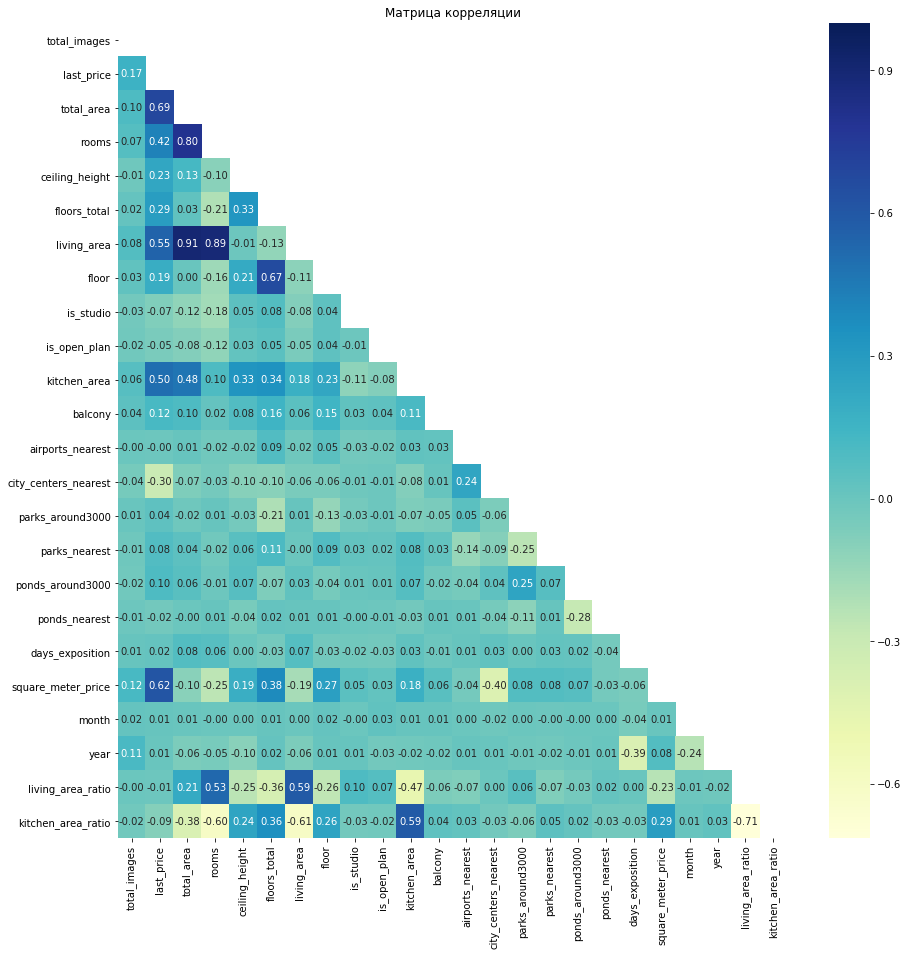

In [51]:
plt.figure(figsize=(15, 15))
matrix = np.triu(df.corr())
sns.heatmap(good_data.corr(), annot=True, fmt='.2f', mask=matrix, cmap="YlGnBu")
plt.title('Матрица корреляции');

Цена квартиры в зависимости от дня недели меняется не значительно. Самая высокая цена в будние дни, самая низкая в выходные.<br>
Зависимость цены от месяца размещения также не существенная. Более низкая цена наблюдается в январе и июне. Самая высокая цена в апреле и сентябре. Скорее всего это связано с популярным временем для отпуска - летом и новогодними праздниками - чем меньше спроса в это время, тем ниже цена.<br>
Год размещения объявления о продаже влияет на цену сильнее. В 2014 году наблюдаются самые высокие цены на квартиры, скорее всего это связано с процентной политикой Центрального Банка, гос. поддержкой по ипотеке и неблагополучной экономической ситуацией в конце 2014 года.

**Выводы**
* Сильнее всего на стоимость квартиры влияет ее площадь - чем больше площадь, тем больше цена. Корреляция положительная, сильная, коэффициент Пирсона составляет 0.69. 
* Чуть слабее корреляция между ценой квартиры и количеством комнат - коэффициент Пирсона составляет 0.42. 
* Между ценой квартиры и удаленность от центра обратная зависимость - чем дальше от центра квартира, тем ниже цена. Корреляция отрицательная, слабая, коэффициент Пирсона составляет -0.30.
* Этаж квартиры также влияет на ее цену: самые дешевые цены на первом этаже, немного дороже стоят квартиры на верхних этажах, а на остальных этажах самые дорогие квартиры.
* Зависимость цены от дня и месяца размещения слабая - немного дороже стоят квартиры, размещенные в будни и немного дешевле - в популярные для отпуска месяцы (январь и июнь).
* Год размещения объявления о продаже влияет на цену сильнее. В 2014 году наблюдаются самые высокие цены на квартиры, скорее всего это связано с процентной политикой Центрального Банка, гос. поддержкой по ипотеке и неблагополучной экономической ситуацией в конце 2014 года.

### 10 населенных пунктов с наибольшим числом объявлений <a id='analysis4'></a>
Выберем 10 населенных пунктов с наибольшим числов объявлений:

In [52]:
locality_name_10 = good_data['locality_name'].value_counts(ascending=False)[:10]
locality_name_10

Санкт-Петербург      9674
посёлок Мурино        467
посёлок Шушары        368
Всеволожск            283
посёлок Парголово     275
Колпино               269
деревня Кудрово       260
Пушкин                228
Гатчина               219
Выборг                169
Name: locality_name, dtype: int64

Сделаем список из выбранных населенных пунктов и используем его в качестве фильтра для выборки:

In [53]:
locality_name_10_list = [idx for idx in locality_name_10.index]
locality_name_data = good_data.query('locality_name in @locality_name_10_list')

Построим столбчатый график по средней стоимости квадратного метра в выбранных населенных пунктах:

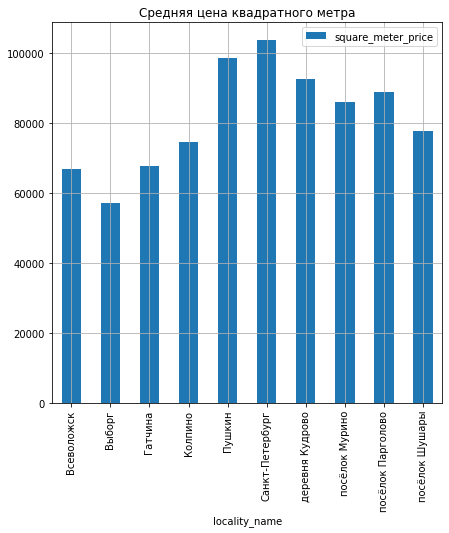

In [54]:
locality_name_data.pivot_table(index='locality_name', 
                               values='square_meter_price').plot(kind='bar',
                                                                title='Средняя цена квадратного метра',
                                                                grid=True,
                                                                figsize=(7, 7),
                                                                )

In [55]:
locality_name_data.pivot_table(index='locality_name', values='square_meter_price')

,square_meter_price
locality_name,
Всеволожск,66972.795088
Выборг,57075.921243
Гатчина,67928.164840
Колпино,74655.083829
Пушкин,98728.268904
Санкт-Петербург,103715.877150
деревня Кудрово,92715.236000
посёлок Мурино,85997.850043
посёлок Парголово,89094.519455


**Выводы** 

Самая высокая стоимость квадратного метра в Санкт-Петербурге - 104 тыс. руб., самая низкая стоимость в Выборге - 57 тыс. руб.

### Квартиры в Санкт-Петербурге <a id='analysis5'></a>
Выделим квартиры, находящиеся в Санкт-Петербурге и добавим столбец с расстоянием до центра в километрах:

In [56]:
st_petersburg = good_data.query('locality_name == "Санкт-Петербург"').copy()
st_petersburg['city_centers_nearest_km'] = round(st_petersburg['city_centers_nearest'] / 1000, 0)
st_petersburg['city_centers_nearest_km'][:10]

9     15.0
10    14.0
15    14.0
18    11.0
21    10.0
24     2.0
25    15.0
26    11.0
27    11.0
29    12.0
Name: city_centers_nearest_km, dtype: float64

Построим график зависимости средней стоимости квадратного метра для каждого километра удаленности от центра:

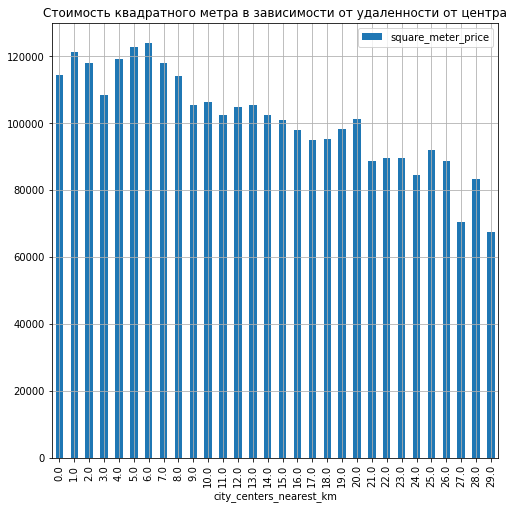

In [57]:
(st_petersburg.pivot_table(index='city_centers_nearest_km', values='square_meter_price')
              .plot(kind='bar',
                   title='Стоимость квадратного метра в зависимости от удаленности от центра',
                   figsize=(8, 8),
                   grid=True
                   )
)

**Выводы**

Чем ближе к центру, тем выше стоимость квадратного метра. Небольшие перепады в стоимости на графике могут объясняться разными ценами в районах. Скорее всего на расстоянии 5-6 км расположены престижные районы с высокой стоимостью жилья. После 8го километра наблюдается заметное снижение стоимости квадратного метра. Можно сделать вывод, что центральная зона ограничена 8 километрами.

### Квартиры в центре <a id='analysis6'></a>
Выделим квартиры, находящиеся не дальше 8 км от центра Санкт-Петербурга:

In [58]:
st_petersburg_center = st_petersburg.query('city_centers_nearest_km <= 8')

Построим гистограммы для каждого из параметров: площадь, цена, число комнат, высота потолков.

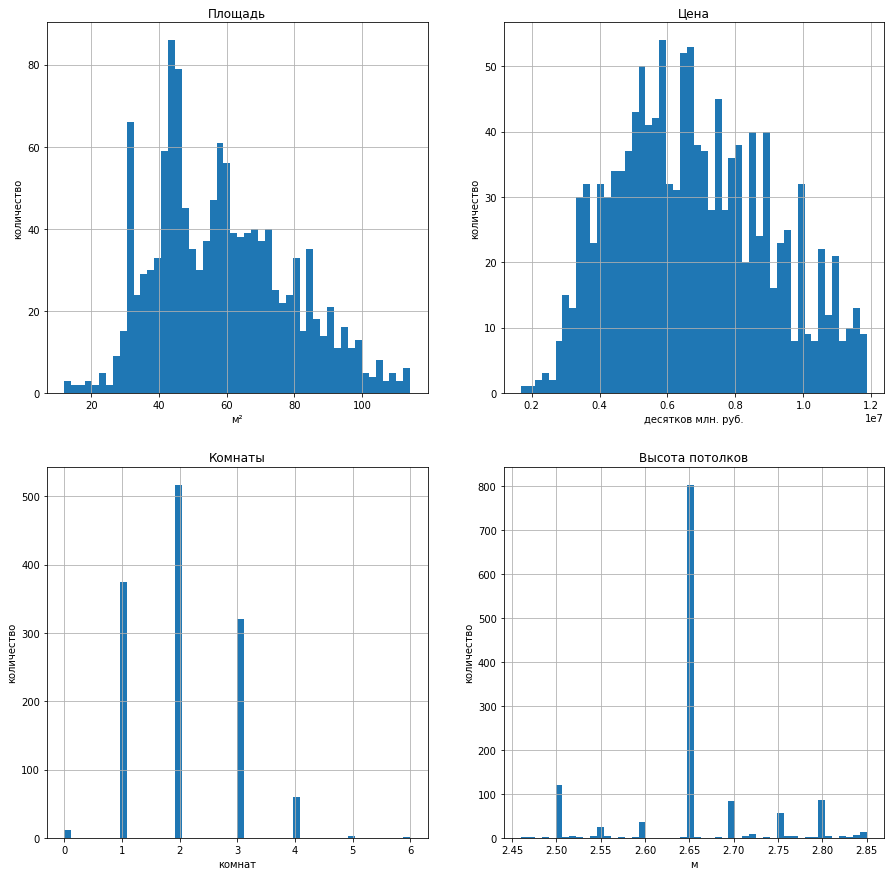

In [59]:
plt.figure(figsize=(15, 15))
cnt = 1
for column in columns_list:
    plt.subplot(2, 2, cnt)
    st_petersburg_center[column].hist(bins=50)
    plt.ylabel('количество')
    if cnt == 1:
        plt.title('Площадь')
        plt.xlabel('м²')
    if cnt == 2:
        plt.title('Цена')
        plt.xlabel('десятков млн. руб.')
    if cnt == 3:
        plt.title('Комнаты')
        plt.xlabel('комнат')
    if cnt == 4:
        plt.title('Высота потолков')
        plt.xlabel('м')
    cnt += 1

Самые часто встречающиеся парметры квартир, выставленных на продажу в центральной части Санкт-Петербурга, следующие:
* площадь от 30 до 60 м² (больше всего квартир с площадью 45 м²);
* цена от 5 до 9 млн. руб. (если выделять более узкий сегмент цены, то чаще всего продаются квартиры за 6.5 - 7 млн. руб.);
* 2 комнаты;
* высота потолков 2.65 м.

Построим графики зависимости цены от количества комнат, этажа, удаленности от центра и даты размещения объявления:

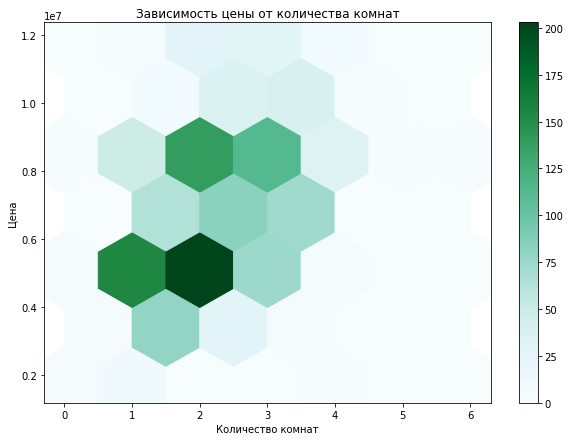

In [60]:
st_petersburg_center.plot(kind='hexbin', 
               x='rooms', 
               y='last_price',
               title='Зависимость цены от количества комнат',
               figsize=(10,7),
               sharex=False,
               gridsize=6,
               )
plt.xlabel('Количество комнат')
plt.ylabel('Цена');

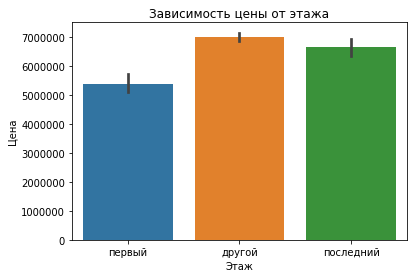

In [61]:
sns.barplot(x='floor_category', y='last_price', data=st_petersburg_center)
plt.ylabel('Цена')
plt.xlabel('Этаж')
plt.title('Зависимость цены от этажа');

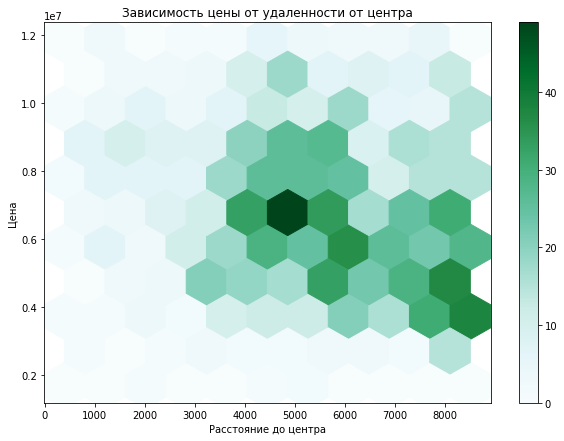

In [62]:
st_petersburg_center.plot(kind='hexbin', 
                x='city_centers_nearest', 
                y='last_price',
                title='Зависимость цены от удаленности от центра',
                figsize=(10,7),
               sharex=False,
               gridsize=10,
                )
plt.ylabel('Цена')
plt.xlabel('Расстояние до центра');

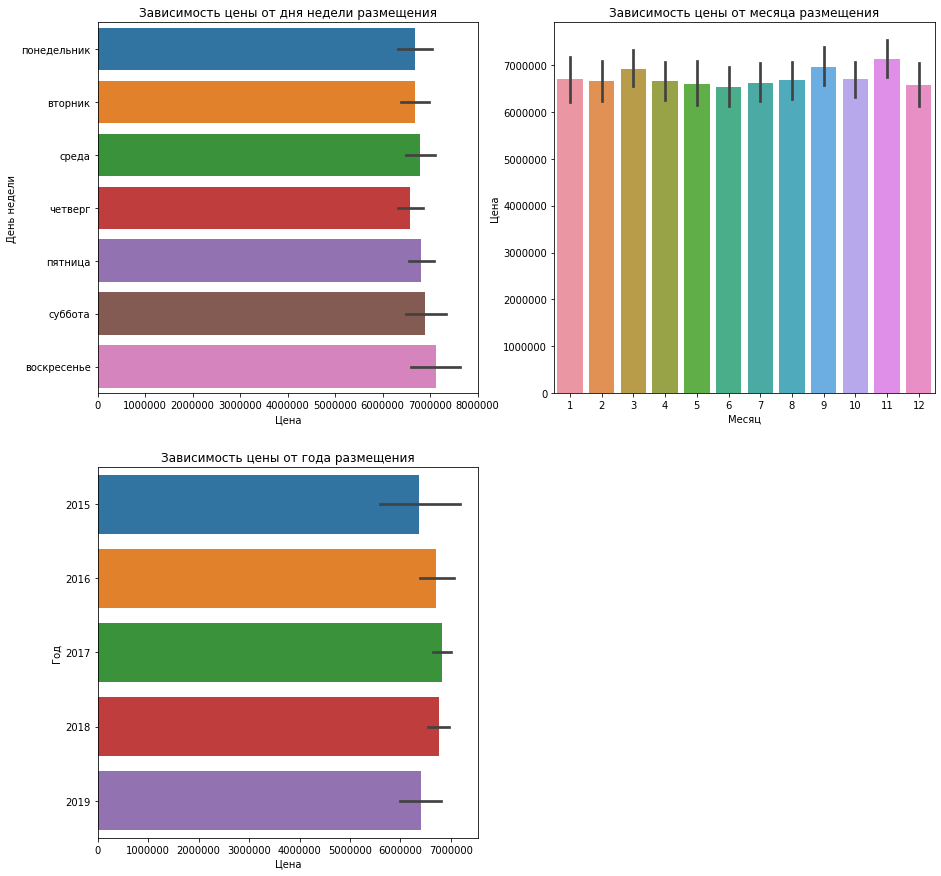

In [63]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.barplot(y='weekday', x='last_price', data=st_petersburg_center, order=weekday_list, orient='h')
plt.xlabel('Цена')
plt.ylabel('День недели')
plt.title('Зависимость цены от дня недели размещения')
plt.subplot(2, 2, 2)
sns.barplot(x='month', y='last_price', data=st_petersburg_center)
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.title('Зависимость цены от месяца размещения')
plt.subplot(2, 2, 3)
sns.barplot(y='year', x='last_price', data=st_petersburg_center, orient='h')
plt.xlabel('Цена')
plt.ylabel('Год')
plt.title('Зависимость цены от года размещения');

* Самые дешевые квартиры на первом этаже. На последнем этаже - подороже. Самые дорогие квартиры на других этажах.
* Цена квартиры в зависимости от дня недели меняется не значительно. Самая высокая цена в воскресенье, самая низкая в четверг.
* Зависимость цены от месяца размещения также не существенная. Более низкая цена наблюдается в январе, декабре и июне. Самая высокая цена в марте, сентябре и ноябре.
* Год размещения также практически не влияет на цену квартиры. Стоит отметить, что в выборку квартир, находящихся не далее 8 км от центра Санкт-Петербурга не вошли квартиры, выставленные на продажу в 2014 году.

Построим две матрицы корреляции: цены квартиры в центре и цены всех квартир (по очищенным от выбросов данным) с остальными параметрами. Отобразим их на `heatmap` в порядке убывания коэффициента Пирсона:

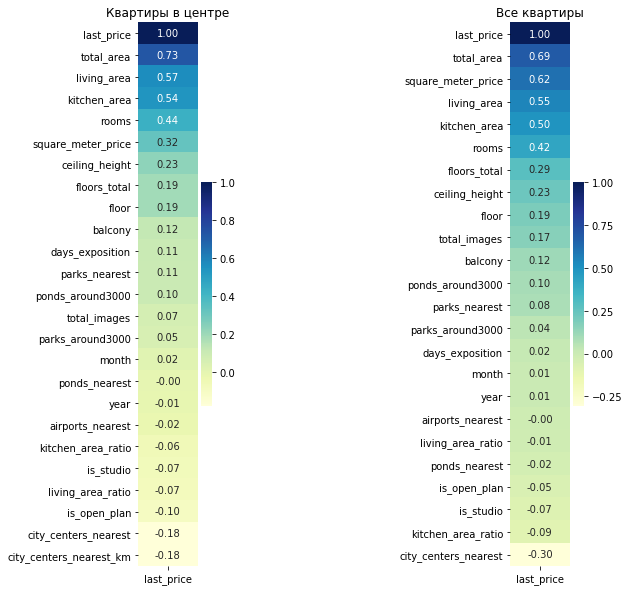

In [64]:
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=4)
plt.subplot(1, 2, 1)
(sns.heatmap(st_petersburg_center
             .corr()[['last_price']]
             .sort_values(by='last_price', ascending=False), cmap="YlGnBu", annot=True, fmt='.2f'
            )
)
plt.title('Квартиры в центре')
plt.subplot(1, 2, 2)
(sns.heatmap(good_data
             .corr()[['last_price']]
             .sort_values(by='last_price', ascending=False), cmap="YlGnBu", annot=True, fmt='.2f'
            )
)
plt.title('Все квартиры');

**Выводы**

Часто встречающиеся парметры квартир, выставленных на продажу в центральной части Санкт-Петербурга, следующие:
* площадь от 30 до 60 м² (больше всего квартир с площадью 45 м²);
* цена от 5 до 9 млн. руб. (если выделять более узкий сегмент цены, то чаще всего продаются квартиры за 6.5 - 7 млн. руб.);
* 2 комнаты;
* высота потолков 2.65 м.

Зависисмость цены от этажа, дня, месяца и года размещения:
* Самые дешевые квартиры на первом этаже. На последнем этаже - подороже. Самые дорогие квартиры на других этажах;
* Цена квартиры в зависимости от дня недели меняется не значительно. Самая высокая цена в воскресенье, самая низкая в четверг;
* Зависимость цены от месяца размещения также не существенная. Более низкая цена наблюдается в январе, декабре и июне. Самая высокая цена в марте, сентябре и ноябре;
* Год размещения также практически не влияет на цену квартиры. Стоит отметить, что в выборку квартир, находящихся не далее 8 км от центра Санкт-Петербурга не вошли квартиры, выставленные на продажу в 2014 году.

Самая высокая корреляция между ценой и площадью квартиры в центре. Она сильнее, чем в целом по выборке и составляет 0.73. Корреляция между ценой и жилой площадью (0.57), количеством комнат (0.44), стоимостью квадратного метра (0.32), высотой потолков (0.23), этажем (0.19) между выборками практически не отличаются. Корреляция между ценой и удаленностью от центра среди квартир, находящихся в центре Санкт-Петербурга отрицательная и незначительная (слабее, чем в целом по выборке). Скорее всего влияние оказывают цены в престижных районах ближе к краю центра города.

## Общие выводы <a id='conclusion'></a>

Цена квартиры зависит от площади, количества комнат, цены за квадратный метр, удаленности от центра и, в меньшей степени, от высоты потолков и этажа. При этом удаленность от центра практически не влияет на стоимость квартир, находящихся в пределах самого центра города.
Зависимости между днем, месяцем и годом размещения объявления практически нет. Исключение составляет 2014 год, в котором возникли обстоятельства, повлиявшие на цену квартир.

Таким образом, предлагаемые параметры, по которым следует оценивать рыночную стоимость объектов, следующие:
* площадь;
* количество комнат;
* высота потолков;
* этаж;
* расстояние до центра.<br>

Самые часто встречающиеся парметры квартир, выставленных на продажу, следующие:
* площадь от 30 до 50 м²;
* цена от 3 до 5 млн. руб.;
* 1-2, немного реже 3 комнаты;
* высота потолков 2.65 м.

Средний срок продажи квартиры 74 дня.

Часто встречающиеся парметры квартир, выставленных на продажу в центральной части Санкт-Петербурга, следующие:
* площадь от 30 до 60 м² (больше всего квартир с площадью 45 м²);
* цена от 5 до 9 млн. руб. (если выделять более узкий сегмент цены, то чаще всего продаются квартиры за 6.5 - 7 млн. руб.);
* 2 комнаты;
* высота потолков 2.65 м.

Аномальные значения, на которые стоит обращать внимание:
* площадь меньше 12 или больше 114.25 м²;
* цена меньше 500 тыс. руб. и больше 11.875 млн. руб.;
* наличие больше 6 комнат;
* высота потолка менее 2.45 м и более 2.85 м.

Также предлагаю сделать обязательными для заполнения поля анкеты при размещении на сайте для минимизации потери данных.